<a href="https://colab.research.google.com/github/PepoAmbriz/P2-Cosmology-CLASS/blob/main/P2Cosmo_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto 2 de cosmología, José Francisco Ambriz Gutiérrez**

Se hacen variaciones de los parámetros cosmológicos dentro del software CLASS con la finalidad de desarrollar un poco de intuición. 

In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive')
!mkdir Cosmology2022

mkdir: cannot create directory ‘Cosmology2022’: File exists


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/Cosmology2022')  #nos metemos al directorio

In [ ]:
! git clone https://github.com/lesgourg/class_public

Cloning into 'class_public'...
remote: Enumerating objects: 24624, done.
remote: Total 24624 (delta 0), reused 0 (delta 0), pack-reused 24624
Receiving objects: 100% (24624/24624), 676.31 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (16298/16298), done.
Checking out files: 100% (272/272), done.


In [ ]:
os.chdir('/content/drive/MyDrive/Cosmology2022/class_public')

In [ ]:
#ls para revisar, make para compilar, make clear pa limpiar por las dudas
#los archivos.ini nos ayudarán a correrlo
#

In [ ]:
! ls


In [ ]:
! make

cp python/setup.py python/autosetup.py
cd python; export CC=gcc; python autosetup.py install || python autosetup.py install --user
running install
running build
running build_ext
skipping '/content/drive/MyDrive/Cosmology2022/class_public/python/../python/classy.c' Cython extension (up-to-date)
running install_lib
copying build/lib.linux-x86_64-3.7/classy.cpython-37m-x86_64-linux-gnu.so -> /usr/local/lib/python3.7/dist-packages
running install_egg_info
Writing /usr/local/lib/python3.7/dist-packages/classy-3.2.0.egg-info
rm python/autosetup.py


In [ ]:
! ./class default.ini #Corremos class de la manera por default

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ahora leemos los archivos de class sin modificaciones



In [ ]:
#Leer y guardar archivos
data_pk = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default00_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk.columns=['k','P']

data_cl = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default00_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl.columns=['l','TT']

data_bk = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default00_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


Primera Modificación

-Factor de Hubble de 67.810 a 120 y a 30

In [ ]:
!chmod u+x class default.ini   #para dar permisos y ejecutar class

In [ ]:
! ./class default.ini

In [ ]:

#Leemos con nuevo h (modificar h=1.2)
data_pk_h120 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default02_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_h120.columns=['k','P']

data_cl_h120 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default02_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_h120.columns=['l','TT']

data_bk_h120 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default02_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_h120.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
! ./class default.ini #Ejecutar class h=0.3

In [ ]:
#Leemos con nueva temperatura (modificar T_cmb=0.5)
data_pk_h30 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default03_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_h30.columns=['k','P']

data_cl_h30 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default03_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_h30.columns=['l','TT']

data_bk_h30 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default03_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_h30.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


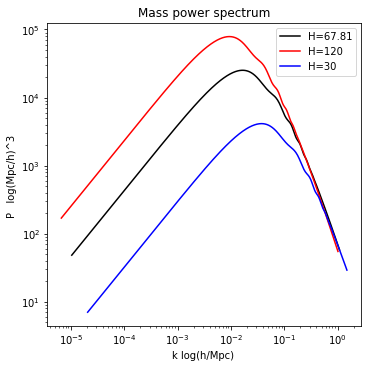

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
data_pk.plot(ax=ax, x='k', y='P', kind="line", label="H=67.81",color="black")
data_pk_h120.plot(ax=ax, x='k', y='P', kind="line", label="H=120",color="red")
data_pk_h30.plot(ax=ax, x='k', y='P', kind="line", label="H=30",color="blue")
plt.xscale('log')
plt.yscale('log')
plt.title('Mass power spectrum')
ax.set_xlabel("k log(h/Mpc) ")
ax.set_ylabel("P   log(Mpc/h)^3 ")
ax.legend(loc=0)
plt.show()



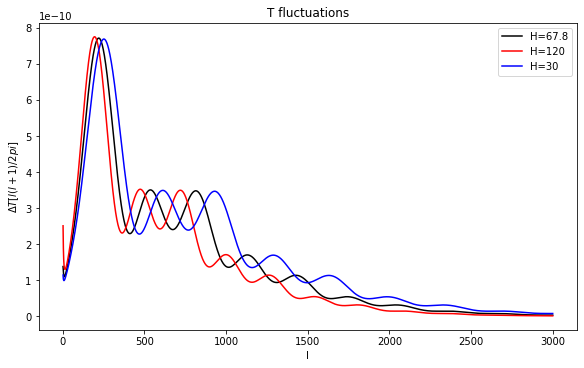

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
data_cl.plot(ax=ax, x='l', y='TT', kind="line", label="H=67.8",color="black")
data_cl_h120.plot(ax=ax, x='l', y='TT', kind="line", label="H=120",color="red")
data_cl_h30.plot(ax=ax, x='l', y='TT', kind="line", label="H=30",color="blue")
#plt.xscale('log')

plt.title('T fluctuations')
ax.set_xlabel("l")
ax.set_ylabel("$\Delta T  [l(l+1)/2pi]$")
ax.legend(loc=0)
plt.show()


In [ ]:
!less '/content/drive/MyDrive/Cosmology2022/class_public/output/default00_background.dat'

# Table of selected background quantities
# All densities are multiplied by (8piG/3) (below, shortcut notation (.) for thi s factor) 
# Densities are in units [Mpc^-2] while all distances are in [Mpc]. 
#    1:z                      2:proper time [Gyr]      3:conf. time [Mpc]        4:H [1/Mpc]              5:comov. dist.           6:ang.diam.dist.         7:lum . dist.             8:comov.snd.hrz.         9:(.)rho_g              10:(.)rho_b               11:(.)rho_cdm            12:(.)rho_lambda         13:(.)rho_ur              14:(.)rho_crit           15:(.)rho_tot            16:(.)p_tot               17:(.)p_tot_prime        18:gr.fac. D             19:gr.fac. f          
       1.000000000000e+14       7.559518509157e-26       4.634785000235e-09        2.157256292802e+22       1.415189798880e+04       1.415189798880e-10       1.4 15189798880e+18       2.676317464532e-09       2.751560535470e+44       2.490422 367464e+33       1.336376166075e+34       3.530299370118e-08   

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


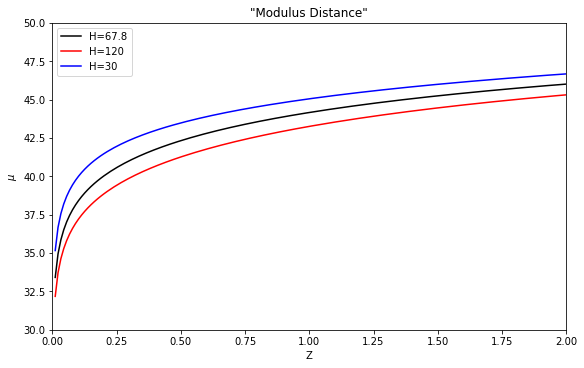

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
ax.plot( data_bk['Z'], 5*np.log10(data_bk['d_l'])+25, label="H=67.8",color="black")
ax.plot( data_bk_h120['Z'], 5*np.log10(data_bk_h120['d_l'])+25, label="H=120",color="red")
ax.plot( data_bk_h30['Z'], 5*np.log10(data_bk_h30['d_l'])+25, label="H=30",color="blue")


#plt.xscale('log')
plt.xlim(0,2)
plt.ylim(30,50)
plt.title('"Modulus Distance"')
ax.set_xlabel("Z")
ax.set_ylabel("$\mu$")
ax.legend(loc=0)
plt.show()

Segunda variación

 omega_cdm de 0.12 a 0.5 y a 0.01

In [ ]:
! ./class default.ini

In [ ]:
#Leemos con nuevo omega_cdm (modificar 0.5)
data_pk_ocdm1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default15_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_ocdm1.columns=['k','P']

data_cl_ocdm1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default15_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_ocdm1.columns=['l','TT']

data_bk_ocdm1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default15_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_ocdm1.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

#Leemos con nuevo omega_cdm (modificar 0.01)
data_pk_ocdm2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default16_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_ocdm2.columns=['k','P']

data_cl_ocdm2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default16_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_ocdm2.columns=['l','TT']

data_bk_ocdm2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default16_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_ocdm2.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


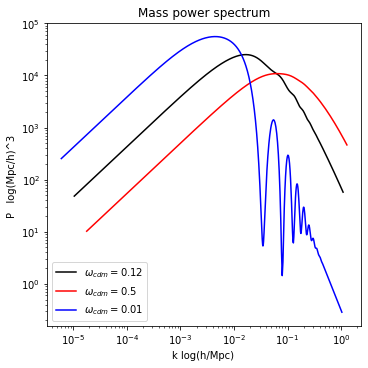

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
data_pk.plot(ax=ax, x='k', y='P', kind="line", label="$\omega_{cdm}=0.12$",color="black")
data_pk_ocdm1.plot(ax=ax, x='k', y='P', kind="line", label="$\omega_{cdm}=0.5$",color="red")
data_pk_ocdm2.plot(ax=ax, x='k', y='P', kind="line", label="$\omega_{cdm}=0.01$",color="blue")
plt.xscale('log')
plt.yscale('log')
plt.title('Mass power spectrum')
ax.set_xlabel("k log(h/Mpc) ")
ax.set_ylabel("P   log(Mpc/h)^3 ")
ax.legend(loc=0)
plt.show()



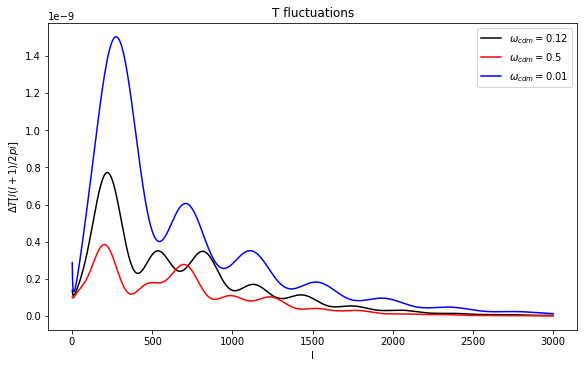

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
data_cl.plot(ax=ax, x='l', y='TT', kind="line", label="$\omega_{cdm}=0.12$",color="black")
data_cl_ocdm1.plot(ax=ax, x='l', y='TT', kind="line", label="$\omega_{cdm}=0.5$",color="red")
data_cl_ocdm2.plot(ax=ax, x='l', y='TT', kind="line", label="$\omega_{cdm}=0.01$",color="blue")
#plt.xscale('log')

plt.title('T fluctuations')
ax.set_xlabel("l")
ax.set_ylabel("$\Delta T  [l(l+1)/2pi]$")
ax.legend(loc=0)
plt.show()


Variacion de omega_b

de 0.022 a 0.1 y 0.003

In [ ]:
! ./class default.ini

In [ ]:
#Leemos con nuevo omega_cdm (modificar 0.5)
data_pk_ob1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default17_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_ob1.columns=['k','P']

data_cl_ob1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default17_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_ob1.columns=['l','TT']

data_bk_ob1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default17_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_ob1.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

#Leemos con nuevo omega_cdm (modificar 0.01)
data_pk_ob2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default18_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_ob2.columns=['k','P']

data_cl_ob2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default18_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_ob2.columns=['l','TT']

data_bk_ob2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default18_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_ob2.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


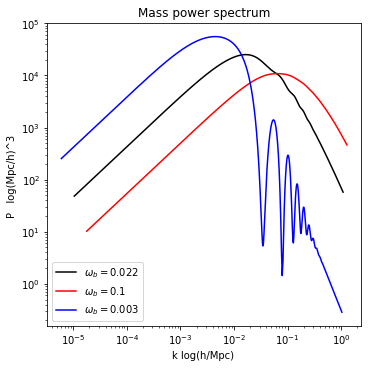

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
data_pk.plot(ax=ax, x='k', y='P', kind="line", label="$\omega_{b}=0.022$",color="black")
data_pk_ocdm1.plot(ax=ax, x='k', y='P', kind="line", label="$\omega_{b}=0.1$",color="red")
data_pk_ocdm2.plot(ax=ax, x='k', y='P', kind="line", label="$\omega_{b}=0.003$",color="blue")
plt.xscale('log')
plt.yscale('log')
plt.title('Mass power spectrum')
ax.set_xlabel("k log(h/Mpc) ")
ax.set_ylabel("P   log(Mpc/h)^3 ")
ax.legend(loc=0)
plt.show()



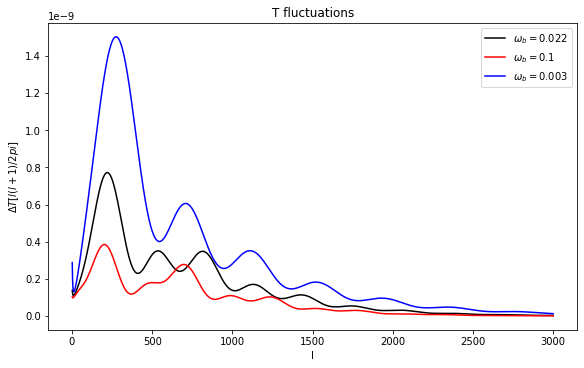

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
data_cl.plot(ax=ax, x='l', y='TT', kind="line", label="$\omega_{b}=0.022$",color="black")
data_cl_ocdm1.plot(ax=ax, x='l', y='TT', kind="line", label="$\omega_{b}=0.1$",color="red")
data_cl_ocdm2.plot(ax=ax, x='l', y='TT', kind="line", label="$\omega_{b}=0.003$",color="blue")
#plt.xscale('log')

plt.title('T fluctuations')
ax.set_xlabel("l")
ax.set_ylabel("$\Delta T  [l(l+1)/2pi]$")
ax.legend(loc=0)
plt.show()


Variación de la T_cmb


Original 2.7255

caso 1= 2.00

caso 2= 2.87


In [ ]:
! ./class default.ini

In [ ]:
#Leemos con nuevo omega_cdm (modificar 0.5)
data_pk_T1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default22_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_T1.columns=['k','P']

data_cl_T1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default22_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_T1.columns=['l','TT']

data_bk_T1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default22_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_T1.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

#Leemos con nuevo omega_cdm (modificar 0.01)
data_pk_T2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default31_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_T2.columns=['k','P']

data_cl_T2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default31_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_T2.columns=['l','TT']

data_bk_T2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default31_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_T2.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


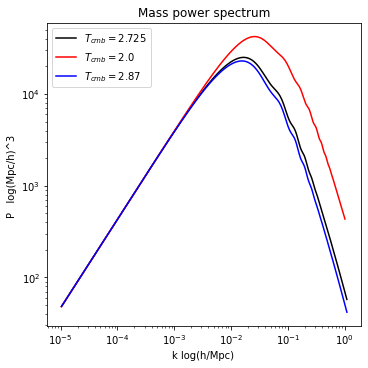

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
data_pk.plot(ax=ax, x='k', y='P', kind="line", label="$T_{cmb}=2.725$",color="black")
data_pk_T1.plot(ax=ax, x='k', y='P', kind="line", label="$T_{cmb}=2.0$",color="red")
data_pk_T2.plot(ax=ax, x='k', y='P', kind="line", label="$T_{cmb}=2.87$",color="blue")
plt.xscale('log')
plt.yscale('log')
plt.title('Mass power spectrum')
ax.set_xlabel("k log(h/Mpc) ")
ax.set_ylabel("P   log(Mpc/h)^3 ")
ax.legend(loc=0)
plt.show()



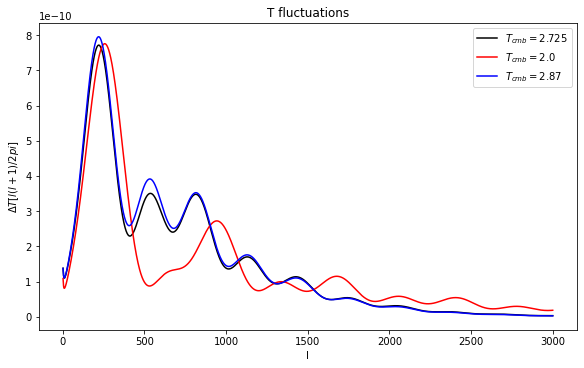

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
data_cl.plot(ax=ax, x='l', y='TT', kind="line", label="$T_{cmb}=2.725$",color="black")
data_cl_T1.plot(ax=ax, x='l', y='TT', kind="line", label="$T_{cmb}=2.0$",color="red")
data_cl_T2.plot(ax=ax, x='l', y='TT', kind="line", label="$T_{cmb}=2.87$",color="blue")
#plt.xscale('log')

plt.title('T fluctuations')
ax.set_xlabel("l")
ax.set_ylabel("$\Delta T  [l(l+1)/2pi]$")
ax.legend(loc=0)
plt.show()


Variación de varios parámetros a la vez

Caso 1. H=150, omega_cdm=0.5, omega_b=0.1

Caso 2. H=10,  omega_cdm=0.2, omega_b=0.003

In [ ]:
! ./class default.ini

In [ ]:
#Leemos con nuevo omega_cdm (modificar 0.5)
data_pk_varios1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default20_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_varios1.columns=['k','P']

data_cl_varios1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default20_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_varios1.columns=['l','TT']

data_bk_varios1 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default20_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_varios1.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

#Leemos con nuevo omega_cdm (modificar 0.01)
data_pk_varios2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default21_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_varios2.columns=['k','P']

data_cl_varios2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default21_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_varios2.columns=['l','TT']

data_bk_varios2 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default21_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_varios2.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


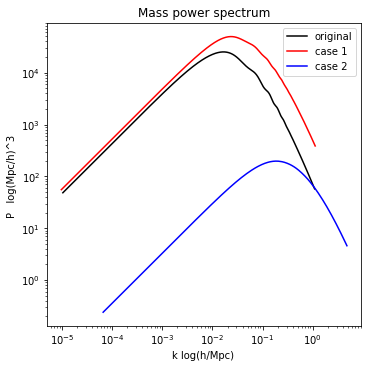

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
data_pk.plot(ax=ax, x='k', y='P', kind="line", label="original",color="black")
data_pk_varios1.plot(ax=ax, x='k', y='P', kind="line", label="case 1",color="red")
data_pk_varios2.plot(ax=ax, x='k', y='P', kind="line", label="case 2",color="blue")
plt.xscale('log')
plt.yscale('log')
plt.title('Mass power spectrum')
ax.set_xlabel("k log(h/Mpc) ")
ax.set_ylabel("P   log(Mpc/h)^3 ")
ax.legend(loc=0)
plt.show()



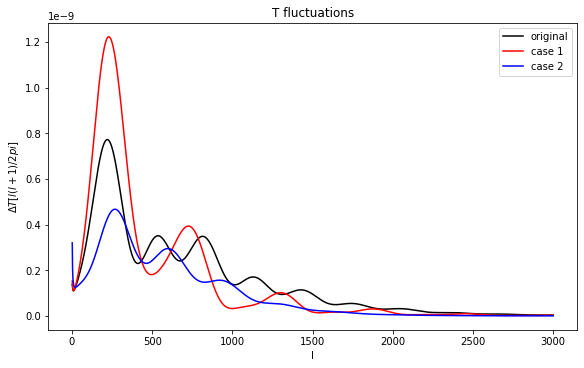

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
data_cl.plot(ax=ax, x='l', y='TT', kind="line", label="original",color="black")
data_cl_varios1.plot(ax=ax, x='l', y='TT', kind="line", label="case 1",color="red")
data_cl_varios2.plot(ax=ax, x='l', y='TT', kind="line", label="case 2",color="blue")
#plt.xscale('log')

plt.title('T fluctuations')
ax.set_xlabel("l")
ax.set_ylabel("$\Delta T  [l(l+1)/2pi]$")
ax.legend(loc=0)
plt.show()


CASO 4

T_cmb=2.0, H=10, o_cdm=0.5, o_b=0.5

In [ ]:
! ./class default.ini

In [ ]:
#Leemos con nuevo omega_cdm (modificar 0.5)
data_pk_4 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default33_pk.dat', delimiter='       ', header=3,usecols=[0,1])   
data_pk_4.columns=['k','P']

data_cl_4 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default33_cl.dat', delimiter='       ', header=10,usecols=[0,1])  
data_cl_4.columns=['l','TT']

data_bk_4 = pd.read_table('/content/drive/MyDrive/Cosmology2022/class_public/output/default33_background.dat', delimiter='       ', header=3,usecols=[0,6,8,9,10,11])   
data_bk_4.columns=['Z','d_l','r_g','r_b','r_cdm','r_lamb']



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


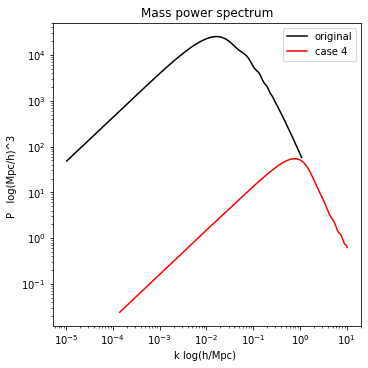

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
#color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
data_pk.plot(ax=ax, x='k', y='P', kind="line", label="original",color="black")
data_pk_4.plot(ax=ax, x='k', y='P', kind="line", label="case 4",color="red")
plt.xscale('log')
plt.yscale('log')
plt.title('Mass power spectrum')
ax.set_xlabel("k log(h/Mpc) ")
ax.set_ylabel("P   log(Mpc/h)^3 ")
ax.legend(loc=0)
plt.show()



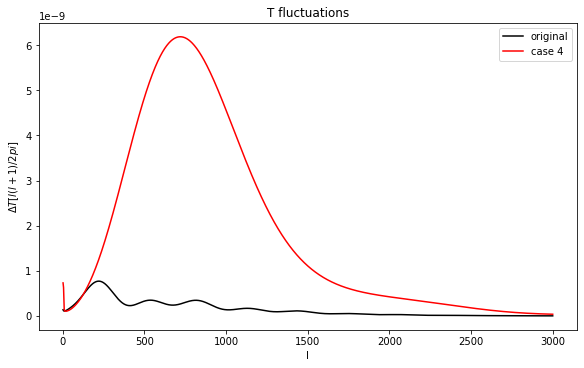

In [ ]:

#Graficamos los datos
fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
data_cl.plot(ax=ax, x='l', y='TT', kind="line", label="original",color="black")
data_cl_4.plot(ax=ax, x='l', y='TT', kind="line", label="case 4",color="red")
#plt.xscale('log')

plt.title('T fluctuations')
ax.set_xlabel("l")
ax.set_ylabel("$\Delta T  [l(l+1)/2pi]$")
ax.legend(loc=0)
plt.show()
